# Ch4

In [1]:
from collections import defaultdict
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from icecream import ic

import ch4

%load_ext autoreload
%autoreload 2

## 4.1

In [2]:
@dataclass
class ValueFunction:
    """ch4.1で使用する価値関数"""

    L1: float
    L2: float

    def update(self):
        # update L1 and L2 simultaneously
        return ValueFunction(L1=self.__update_L1(), L2=self.__update_L2())

    def update_inplace(self):
        # update L1 inplace
        self.L1 = self.__update_L1()
        # update L2 inplace
        self.L2 = self.__update_L2()

    def __update_L1(self):
        return 0.5 * (-1 + 0.9 * self.L1) + 0.5 * (1 + 0.9 * self.L2)

    def __update_L2(self):
        return 0.5 * (0 + 0.9 * self.L1) + 0.5 * (-1 + 0.9 * self.L2)

ic| V: ValueFunction(L1=0.0, L2=-0.5)
ic| V: ValueFunction(L1=-0.22499999999999998, L2=-0.725)
ic| V: ValueFunction(L1=-0.42749999999999994, L2=-0.9274999999999999)
ic| V: ValueFunction(L1=-0.6097499999999999, L2=-1.10975)
ic| V: ValueFunction(L1=-0.7737750000000001, L2=-1.273775)
ic| V: ValueFunction(L1=-0.9213975000000002, L2=-1.4213975)
ic| V: ValueFunction(L1=-1.05425775, L2=-1.55425775)
ic| V: ValueFunction(L1=-1.1738319750000001, L2=-1.6738319750000001)
ic| V: ValueFunction(L1=-1.2814487775, L2=-1.7814487775)
ic| V: ValueFunction(L1=-1.3783038997500001, L2=-1.8783038997500001)
ic| V: ValueFunction(L1=-1.4654735097750002, L2=-1.965473509775)
ic| V: ValueFunction(L1=-1.5439261587975002, L2=-2.0439261587975004)
ic| V: ValueFunction(L1=-1.61453354291775, L2=-2.11453354291775)
ic| V: ValueFunction(L1=-1.6780801886259753, L2=-2.1780801886259753)
ic| V: ValueFunction(L1=-1.735272169763378, L2=-2.2352721697633777)
ic| V: ValueFunction(L1=-1.7867449527870403, L2=-2.28674495278704)
ic| V: 

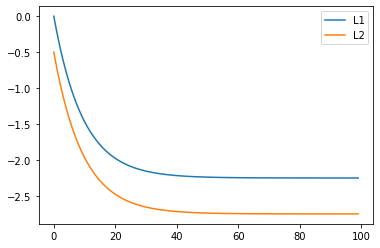

In [3]:
# .2
V = ValueFunction(L1=0, L2=0)
V1_log = []
V2_log = []

for _ in range(100):
    V = V.update()
    ic(V)

    V1_log.append(V.L1)
    V2_log.append(V.L2)

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

ic| V: ValueFunction(L1=-2.249167525908671, L2=-2.749167525908671)
ic| cnt: 76


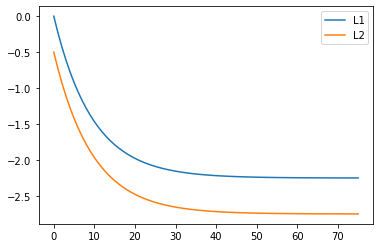

In [4]:
# .2
V = ValueFunction(L1=0, L2=0)

V1_log = []
V2_log = []

# count of update
cnt = 0

while True:
    new_V = V.update()
    delta = max(abs(new_V.L1 - V.L1), abs(new_V.L2 - V.L2))
    V = new_V

    V1_log.append(new_V.L1)
    V2_log.append(new_V.L2)

    cnt += 1
    if delta < 0.0001:
        ic(V)
        ic(cnt)
        break

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

ic| V: ValueFunction(L1=-2.2493782177156936, L2=-2.7494201578106514)
ic| cnt: 60


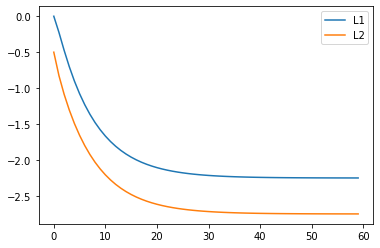

In [5]:
# .3
V = ValueFunction(L1=0, L2=0)

V1_log = []
V2_log = []

cnt = 0
while True:
    L1_old, L2_old = V.L1, V.L2
    V.update_inplace()
    delta = max(abs(V.L1 - L1_old), abs(V.L2 - L2_old))

    V1_log.append(V.L1)
    V2_log.append(V.L2)

    cnt += 1
    if delta < 0.0001:
        ic(V)
        ic(cnt)
        break

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

## 4.2

In [6]:
# .1
env = ch4.GridWorld()

ic(env.height)
ic(env.width)
ic(env.shape)

ic| env.height: 3
ic| env.width: 4
ic| env.shape: (3, 4)


(3, 4)

In [7]:
for action in env.actions():
    ic(action)

ic| action: 0
ic| action: 1
ic| action: 2
ic| action: 3


In [8]:
for state in env.states():
    ic(state)

ic| state: (0, 0)
ic| state: (0, 1)
ic| state: (0, 2)
ic| state: (0, 3)
ic| state: (1, 0)
ic| state: (1, 1)
ic| state: (1, 2)
ic| state: (1, 3)
ic| state: (2, 0)
ic| state: (2, 1)
ic| state: (2, 2)
ic| state: (2, 3)


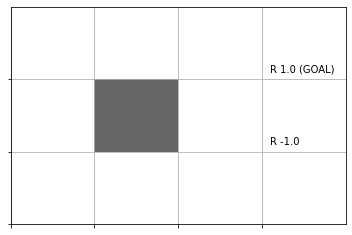

In [9]:
env.render_v()

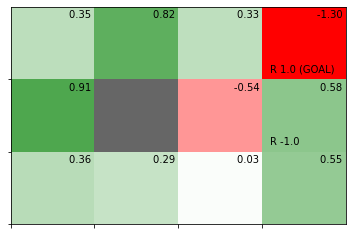

In [10]:
env = ch4.GridWorld()

rng = np.random.default_rng(1)

# dummy values
V = {state: rng.standard_normal() for state in env.states()}

env.render_v(V)

## 4.2

In [11]:
# .2
env = ch4.GridWorld()
V = defaultdict(int)

state = (1, 2)
V[state]

0

In [12]:
pi = defaultdict(lambda: {i: 0.25 for i in range(4)})

state = (0, 1)
pi[state]

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}

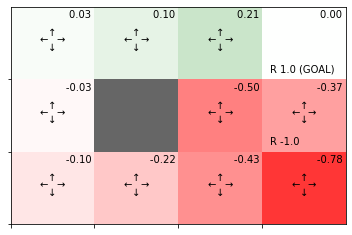

In [13]:
# .3
env = ch4.GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {i: 0.25 for i in range(4)})

V = defaultdict(int)

V = ch4.policy_eval(pi, V, env, gamma)

env.render_v(V, pi)

## 4.4

In [14]:
ch4.argmax??

Signature: ch4.argmax(d: dict)
Docstring: <no docstring>
Source:   
def argmax(d: dict):
    return max(d, key=d.get)
File:      /workspace/src/ch4.py
Type:      function


In [15]:
# .1
action_values = {0: 0.1, 1: -0.3, 2: 9.9, 3: -1.3}

_ = ic(ch4.argmax(action_values))

ic| ch4.argmax(action_values): 2


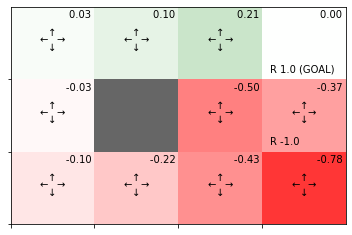

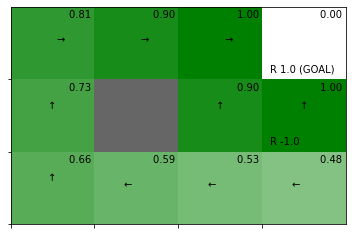

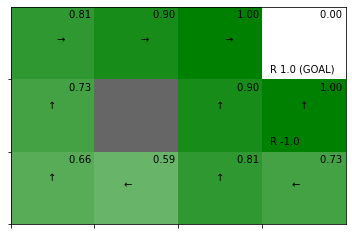

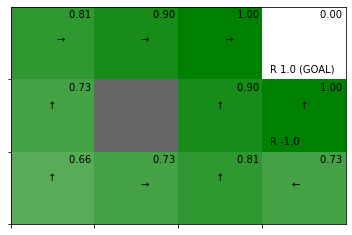

In [16]:
env = ch4.GridWorld()
gamma = 0.9
pi = ch4.policy_iter(env, gamma, is_render=True)

## 4.5

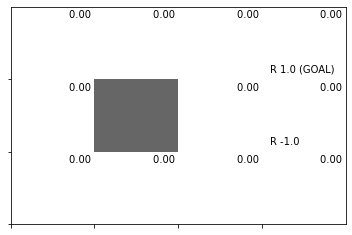

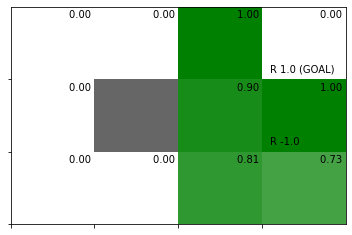

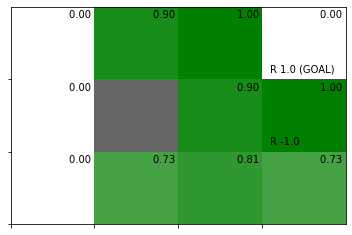

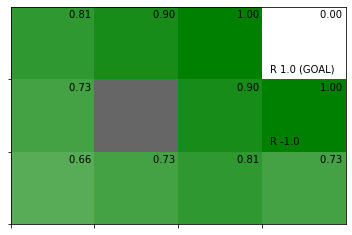

In [17]:
V = defaultdict(float)
eng = ch4.GridWorld()
gamma = 0.9

V = ch4.value_iter(V, env, gamma, is_render=True)